In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def remove_non_red(img):
    """
    Removes all non-red colour from image
    Credit: stackoverflow.com/users/1390022/derricw
    """
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv.inRange(img_hsv, lower_red, upper_red)

    mask = mask0+mask1

    output_img = img.copy()
    output_img[np.where(mask==0)] = 0

    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0

    return output_hsv

Found template.


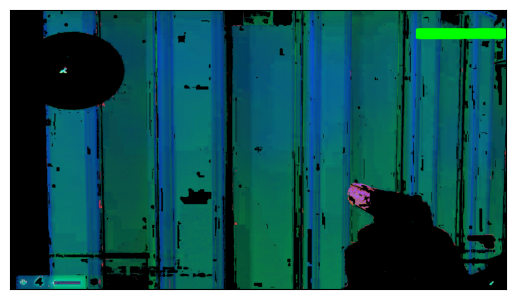

In [86]:
# Credit: https://github.com/learncodebygaming
template = cv.imread('assets/killfeed_template_3.jpg')
template = remove_non_red(template)

full_img = cv.imread('output/frame_4.jpg')
full_img = remove_non_red(full_img)

result = cv.matchTemplate(full_img, template, cv.TM_SQDIFF_NORMED)

# Threshold inverted to work with TM_SQDIFF_NORMED
threshold = 0.9

locations = np.where(result <= threshold)

locations = list(zip(*locations[::-1]))

if locations:
    print('Found template.')

    template_w = template.shape[1]
    template_h = template.shape[0]
    line_color = (0, 255, 0)
    line_type = cv.LINE_4

    # Loop over all the locations and draw their rectangle
    for loc in locations:
        # Determine the box positions
        top_left = loc
        bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
        # Draw the box
        cv.rectangle(full_img, top_left, bottom_right, line_color, line_type)

    plt.imshow(full_img)
    plt.xticks([]), plt.yticks([])
    plt.show()

else:
    print('template not found.')